In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# import tsfel

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score

import seaborn as sns


# Preprocessing

In [2]:
# Creating final dataset
df = []

# Read class data
data = pd.read_csv('../data/files.csv')

# Time series features data
tsfeat = pd.read_csv('../data/ciao.csv')

tsfeat=tsfeat.dropna(axis=1) # delete NaN columns
tsfeat = tsfeat.drop('Unnamed: 0', axis=1)
tsfeat = tsfeat.loc[:,~tsfeat.columns.str.startswith('3_')]

i = 0
for filename in os.listdir('..\data\Train2'):
    df.append(pd.read_csv(os.path.join('..\data\Train2',filename),header = None, names = ['x','y','z','time']))
    i = i + 1    

data['class'] = data['class'].replace([1,2,3,4,5,6,7,8,9,10],[1,1,1,1,1,2,2,2,3,3]) # Classificazione richiesta con 3 classi (moving,falling,other)
#data['class'] = data['class'].replace([1,2,3,4,5,6,7,8,9,10],[1,2,3,4,5,6,6,6,7,8]) # Classificazione con 8 classi
                  

In [3]:
max = []
min = []
for i in range(len(df)):
    max.append(np.max(np.diff(df[i]['time'])))
    min.append(np.min(np.diff(df[i]['time'])))

print(np.max(max))
print(np.min(min)) # Problema con qualche serie temporale in cui i tempi vengono presi male, si potrebbero togliere e trattare come outliers
print(min)
    

0.6200000000000045
0.0
[0.003999999999997783, 0.003999999999997783, 0.003999999999997783, 0.003999999999997783, 0.003999999999990678, 0.003999999999997783, 0.003999999999997783, 0.003999999999997783, 0.003999999999997783, 0.003999999999997783, 0.003999999999990678, 0.003999999999997783, 0.003999999999997783, 0.003999999999990678, 0.003999999999990678, 0.003999999999997783, 0.003999999999997783, 0.003999999999997783, 0.003999999999997783, 0.003999999999990678, 0.003999999999990678, 0.003999999999990678, 0.003999999999990678, 0.003999999999990678, 0.0, 0.0, 0.003999999999990678, 0.003999999999990678, 0.003999999999990678, 0.0, 0.003999999999990678, 0.003999999999990678, 0.003999999999997783, 0.003999999999990678, 0.003999999999990678, 0.003999999999990678, 0.003999999999990678, 0.003999999999990678, 0.003999999999990678, 0.003999999999990678, 0.003999999999997783, 0.003999999999997783, 0.003999999999997783, 0.003999999999997783, 0.003999999999997783, 0.003999999999997783, 0.0039999999999

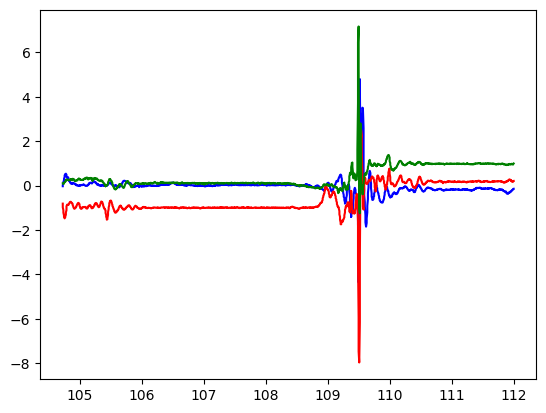

In [4]:
# Plot example
ind = 467
plt.plot(df[ind]['time'],df[ind]['x'], color = 'b')
plt.plot(df[ind]['time'],df[ind]['y'], color = 'r')
plt.plot(df[ind]['time'],df[ind]['z'], color = 'g')

In [5]:
# Division in Train and Test set (66%-33%)
X_train, X_test, Y_train, Y_test = train_test_split(tsfeat, data['class'], test_size=0.33, random_state=1999)

In [6]:
# First Feature selection
col_drop = []

for i in np.arange(0,3):
    col_drop.append(str(i) + '_Standard deviation') #! Molto correlata con variance
    col_drop.append(str(i) + '_Centroid')
    col_drop.append(str(i) + '_Autocorrelation')
    col_drop.append(str(i) + '_Absolute energy')
    col_drop.append(str(i) + '_Mean absolute deviation')
    col_drop.append(str(i) + '_Median absolute deviation')
    col_drop.append(str(i) + '_Root mean square')
    col_drop.append(str(i) + '_Slope')
    col_drop.append(str(i) + '_Power bandwidth')
    col_drop.append(str(i) + '_Spectral roll-off')
    col_drop.append(str(i) + '_Spectral roll-on')
    col_drop.append(str(i) + '_Neighbourhood peaks')
    col_drop.append(str(i) + '_Spectral centroid')
    col_drop.append(str(i) + '_Spectral entropy')
    col_drop.append(str(i) + '_Spectral spread')
    col_drop.append(str(i) + '_Positive turning points')
    col_drop.append(str(i) + '_Negative turning points')
    col_drop.append(str(i) + '_Peak to peak distance')
    col_drop.append(str(i) + '_Spectral positive turning points')
    col_drop.append(str(i) + '_Sum absolute diff')
    col_drop.append(str(i) + '_Total energy')
    col_drop.append(str(i) + '_Spectral kurtosis')
    col_drop.append(str(i) + '_Zero crossing rate')
    col_drop.append(str(i) + '_Spectral slope')


for i in np.arange(0,3):
    for j in np.arange(0,2):
        col_drop.append(str(i) + '_ECDF Percentile Count_' + str(j))

for i in np.arange(0,3):
    for j in np.arange(0,2):
        col_drop.append(str(i) + '_ECDF Percentile_' + str(j))
    

for i in np.arange(0,3):
    for j in np.arange(1,10):
        col_drop.append(str(i) + '_ECDF_' + str(j))

for i in np.arange(0,3):
    for j in np.arange(2,195): # Anche se da 2 fino a 10 non erano troppo correlati
        col_drop.append(str(i) + '_FFT mean coefficient_' + str(j))

for i in np.arange(0,3):
    for j in np.arange(1,10): # Anche se non erano troppo correlati
        col_drop.append(str(i) + '_Histogram_' + str(j))

for i in np.arange(0,3):
    for j in np.arange(1,12): # Anche se 1 e 2 non erano troppo correlati
        col_drop.append(str(i) + '_LPCC_' + str(j))

for i in np.arange(0,3):
    for j in np.arange(1,11): # Anche se non erano troppo correlati
        col_drop.append(str(i) + '_MFCC_' + str(j))

for i in np.arange(0,3):
    for j in np.arange(1,9):
        col_drop.append(str(i) + '_Wavelet absolute mean_' + str(j))

for i in np.arange(0,3):
    for j in np.arange(0,9):
        col_drop.append(str(i) + '_Wavelet energy_' + str(j))

for i in np.arange(0,3):
    for j in np.arange(0,9):
        col_drop.append(str(i) + '_Wavelet standard deviation_' + str(j))

for i in np.arange(0,3):
    for j in np.arange(0,9):
        col_drop.append(str(i) + '_Wavelet variance_' + str(j))


X_train = X_train.drop(col_drop, axis=1)
X_test = X_test.drop(col_drop, axis=1)

In [7]:
X_train.shape

(313, 99)

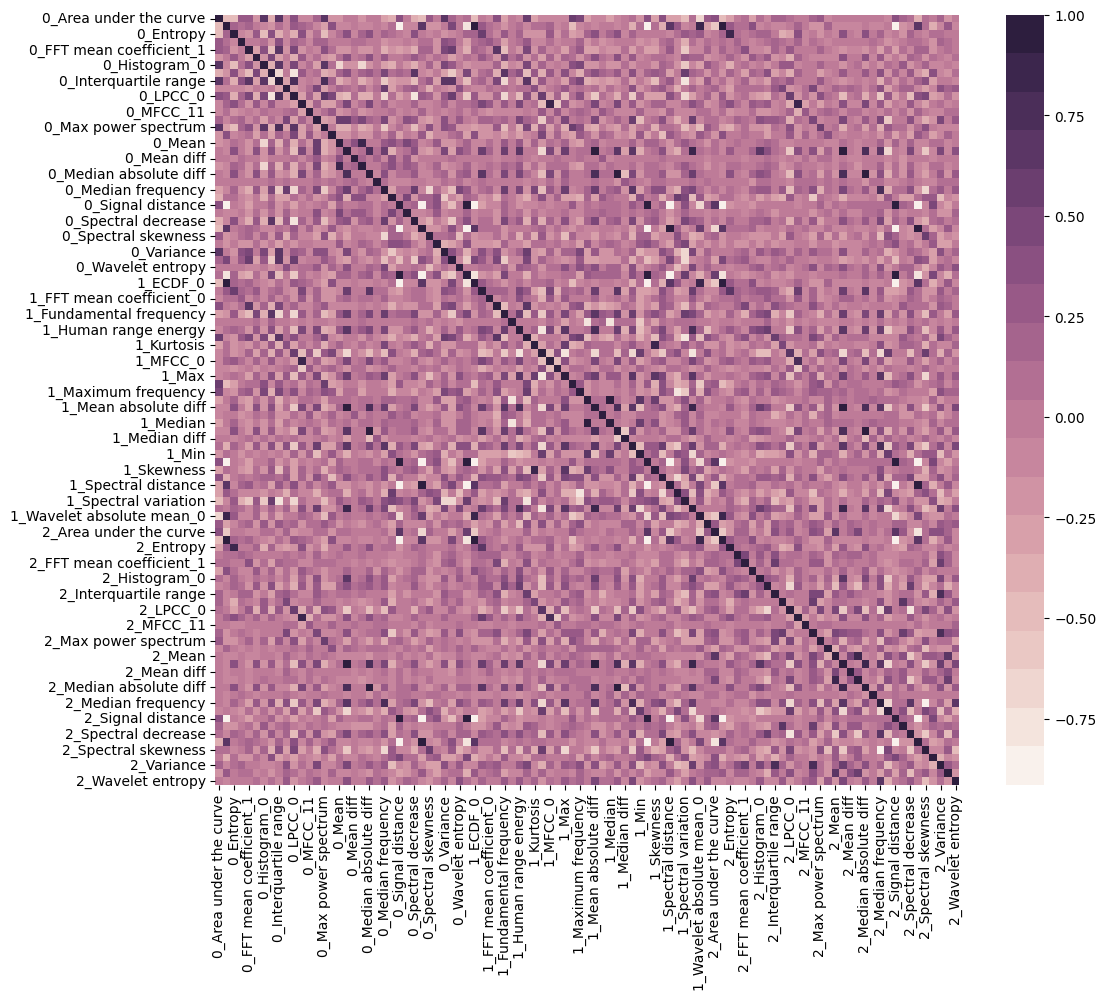

In [8]:
# Correlation plot for some of th efeatures
plt.figure(figsize=(12,10))
ax=sns.heatmap(X_train.corr(), annot=False, cmap=sns.cubehelix_palette(20,  light=0.95, dark=0.15))
ax.xaxis.tick_top
plt.show()

In [9]:
# Normalising Features
std_scaler = StandardScaler()
 
X_train_scaled = std_scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled, columns= X_train.columns)
X_test_scaled = std_scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled, columns= X_test.columns)

In [31]:
# Feature selection using Support Vector Classification

# sfs = SequentialFeatureSelector(SVC(), k_features=50, verbose=2, cv=2, n_jobs=8)
# sfs.fit(X_train, Y_train)
# SequentialFeatureSelector(estimator=KNeighborsClassifier(n_neighbors=3),n_features_to_select=40)

In [10]:
from sklearn.feature_selection import SequentialFeatureSelector

# Feature selection using KNN
knn = KNeighborsClassifier(n_neighbors=3)
sfs = SequentialFeatureSelector(knn, n_features_to_select=40) #I would add cv=5
sfs.fit(X_train, Y_train)
SequentialFeatureSelector(estimator=KNeighborsClassifier(n_neighbors=3),n_features_to_select=40)

SequentialFeatureSelector(estimator=KNeighborsClassifier(n_neighbors=3),
                          n_features_to_select=40)

In [11]:
names = sfs.get_feature_names_out()
print(names)
# col_numbers = []
# for i in range(len(names)):
#     col_numbers.append(names[i][1:2])

# print(col_numbers)


['0_ECDF_0' '0_Entropy' '0_Fundamental frequency' '0_Histogram_0'
 '0_Human range energy' '0_Interquartile range' '0_Kurtosis' '0_MFCC_11'
 '0_Mean absolute diff' '0_Median absolute diff' '0_Signal distance'
 '0_Skewness' '0_Spectral distance' '0_Spectral variation'
 '0_Wavelet absolute mean_0' '1_Area under the curve' '1_ECDF_0'
 '1_Entropy' '1_FFT mean coefficient_0' '1_Fundamental frequency'
 '1_Histogram_0' '1_Human range energy' '1_Kurtosis' '1_LPCC_0' '1_MFCC_0'
 '1_Max' '1_Mean' '1_Mean absolute diff' '1_Median'
 '1_Median absolute diff' '1_Median diff' '1_Min' '1_Signal distance'
 '1_Skewness' '1_Spectral decrease' '1_Spectral distance' '1_Variance'
 '2_Mean absolute diff' '2_Median absolute diff' '2_Min']


In [12]:
# Features selected by KNN
col_numbers = [0,2,3,4,6,8,9,10,14,17,19,20,22,24,26,30,31,32,33,37,38,40,41,47,50,51,53,54,55,56,59,60,62,63,72,75,79,80,83,96]
X_train.columns[col_numbers]

Index(['0_Area under the curve', '0_Entropy', '0_FFT mean coefficient_0',
       '0_FFT mean coefficient_1', '0_Histogram_0', '0_Interquartile range',
       '0_Kurtosis', '0_LPCC_0', '0_Max power spectrum',
       '0_Mean absolute diff', '0_Median', '0_Median absolute diff',
       '0_Median frequency', '0_Signal distance', '0_Spectral decrease',
       '0_Variance', '0_Wavelet absolute mean_0', '0_Wavelet entropy',
       '1_Area under the curve', '1_FFT mean coefficient_1',
       '1_Fundamental frequency', '1_Human range energy',
       '1_Interquartile range', '1_Max power spectrum', '1_Mean absolute diff',
       '1_Mean diff', '1_Median absolute diff', '1_Median diff',
       '1_Median frequency', '1_Min', '1_Spectral decrease',
       '1_Spectral distance', '1_Spectral variation', '1_Variance',
       '2_Histogram_0', '2_Kurtosis', '2_Max', '2_Max power spectrum',
       '2_Mean absolute diff', '2_Variance'],
      dtype='object')

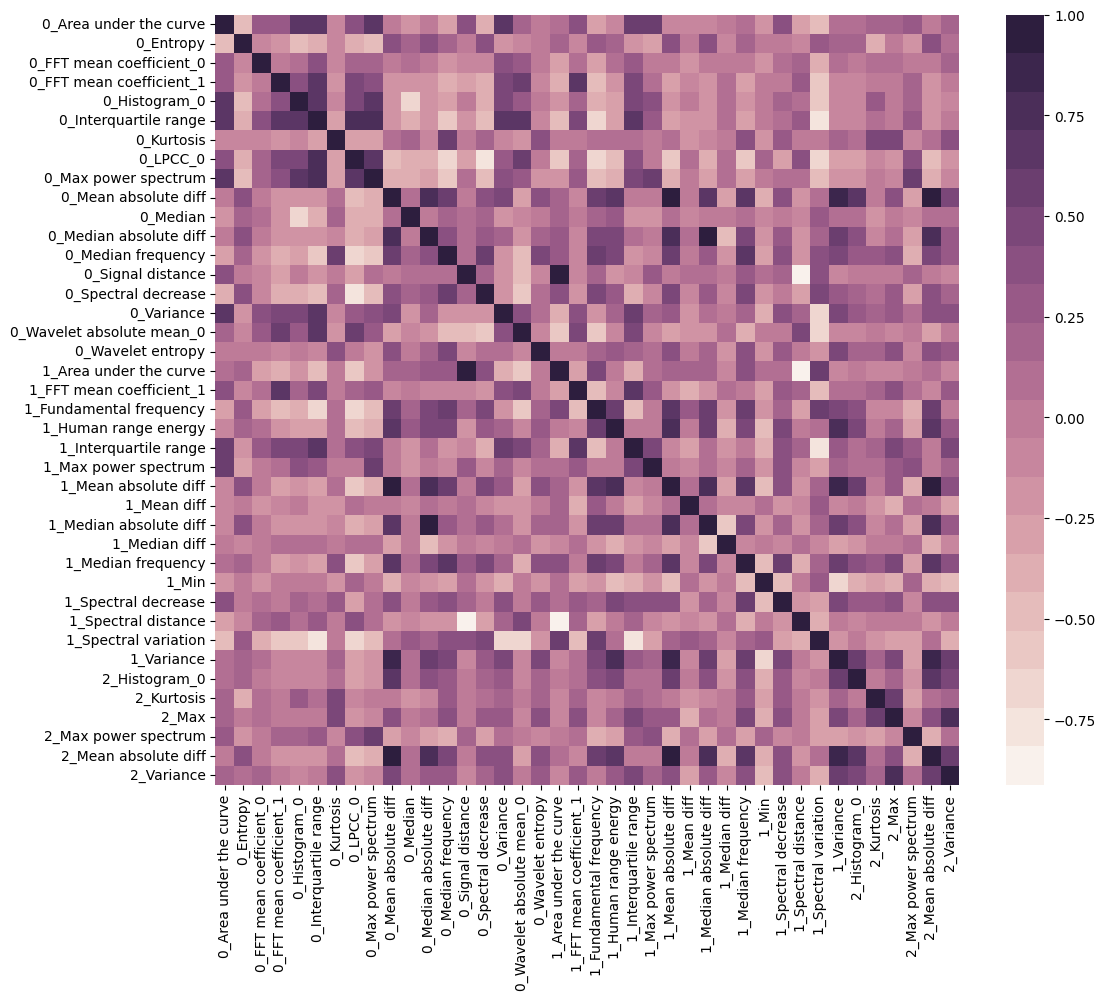

In [13]:
# Corrplot of final features
plt.figure(figsize=(12,10))
ax=sns.heatmap(X_train.iloc[:,col_numbers].corr(), annot=False, cmap=sns.cubehelix_palette(20,  light=0.95, dark=0.15))
ax.xaxis.tick_top
plt.show()

In [14]:
# Classification with Random Forests
classifier = RandomForestClassifier(min_samples_split=10)

activities = ['moving', 'falling', 'others']
#activities = ['moving', 'running', 'jumping','waling_down', 'walking_up', 'falling','lying','other']


# Train The Classifier
classifier.fit(X_train.iloc[:,col_numbers], Y_train.ravel())

# Predict Test Data
y_predict = classifier.predict(X_test.iloc[:,col_numbers])

# Get the Classification Report
accuracy = accuracy_score(Y_test, y_predict)*100
print(classification_report(Y_test, y_predict, target_names = activities))
print('Accuracy: ' + str(accuracy) + '%')

              precision    recall  f1-score   support

      moving       1.00      0.99      0.99        79
     falling       0.88      1.00      0.94        29
      others       0.98      0.91      0.95        47

    accuracy                           0.97       155
   macro avg       0.95      0.97      0.96       155
weighted avg       0.97      0.97      0.97       155

Accuracy: 96.7741935483871%


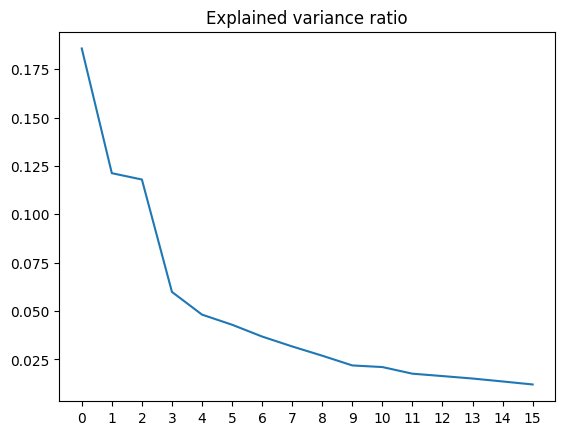

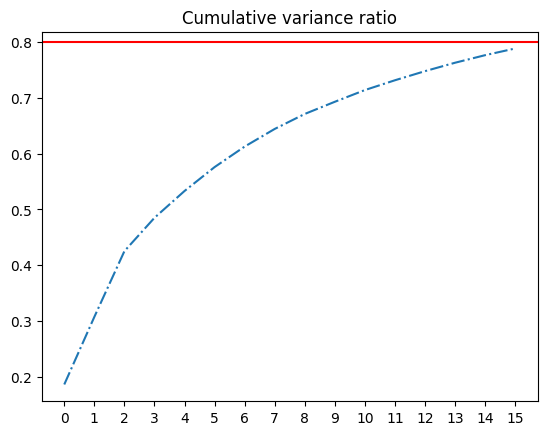

In [15]:
# PCA with scaled data
n_components=16
pca = PCA(n_components)
pca.fit(X_train)

meanshape = pca.mean_

fig, ax=plt.subplots()
plt.plot(pca.explained_variance_ratio_)
ax.set_title("Explained variance ratio")
x=range(n_components)
plt.xticks(ticks=x, labels=None)

fig, ax=plt.subplots()
plt.plot(np.cumsum(pca.explained_variance_ratio_),linestyle="-.")
ax.set_title("Cumulative variance ratio")
plt.xticks(ticks=x, labels=None)
plt.axhline(y=0.8, color='r', linestyle='-')

In [16]:
# Classification with Decision Tree
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()

activities = ['moving', 'falling', 'others']
#activities = ['moving', 'running', 'jumping','waling_down', 'walking_up', 'falling','lying','other']


# Train The Classifier
classifier.fit(X_train.iloc[:,col_numbers], Y_train.ravel())

# Predict Test Data
y_predict = classifier.predict(X_test.iloc[:,col_numbers])

# Get the Classification Report
accuracy = accuracy_score(Y_test, y_predict)*100
print(classification_report(Y_test, y_predict, target_names = activities))
print('Accuracy: ' + str(accuracy) + '%')

              precision    recall  f1-score   support

      moving       0.99      0.99      0.99        79
     falling       0.83      0.86      0.85        29
      others       0.89      0.87      0.88        47

    accuracy                           0.93       155
   macro avg       0.90      0.91      0.91       155
weighted avg       0.93      0.93      0.93       155

Accuracy: 92.90322580645162%


In [50]:
# Classification with KNN
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()

activities = ['moving', 'falling', 'others']
#activities = ['moving', 'running', 'jumping','waling_down', 'walking_up', 'falling','lying','other']


# Train The Classifier
classifier.fit(X_train.iloc[:,col_numbers], Y_train.ravel())

# Predict Test Data
y_predict = classifier.predict(X_test.iloc[:,col_numbers])

# Get the Classification Report
accuracy = accuracy_score(Y_test, y_predict)*100
print(classification_report(Y_test, y_predict, target_names = activities))
print('Accuracy: ' + str(accuracy) + '%')


              precision    recall  f1-score   support

      moving       0.99      0.99      0.99        79
     falling       0.88      0.97      0.92        29
      others       0.98      0.91      0.95        47

    accuracy                           0.96       155
   macro avg       0.95      0.96      0.95       155
weighted avg       0.96      0.96      0.96       155

Accuracy: 96.12903225806451%


In [51]:
# Classification with Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression() 

activities = ['moving', 'falling', 'others']
#activities = ['moving', 'running', 'jumping','waling_down', 'walking_up', 'falling','lying','other']


# Train The Classifier
classifier.fit(X_train.iloc[:,col_numbers], Y_train.ravel())

# Predict Test Data
y_predict = classifier.predict(X_test.iloc[:,col_numbers])

# Get the Classification Report
accuracy = accuracy_score(Y_test, y_predict)*100
print(classification_report(Y_test, y_predict, target_names = activities))
print('Accuracy: ' + str(accuracy) + '%')

              precision    recall  f1-score   support

      moving       1.00      0.99      0.99        79
     falling       0.94      1.00      0.97        29
      others       0.98      0.96      0.97        47

    accuracy                           0.98       155
   macro avg       0.97      0.98      0.98       155
weighted avg       0.98      0.98      0.98       155

Accuracy: 98.06451612903226%


In [55]:
# Classification with Naive Bayes
from sklearn.naive_bayes import GaussianNB 
classifier = GaussianNB()

activities = ['moving', 'falling', 'others']
#activities = ['moving', 'running', 'jumping','waling_down', 'walking_up', 'falling','lying','other']


# Train The Classifier
classifier.fit(X_train.iloc[:,col_numbers], Y_train.ravel())

# Predict Test Data
y_predict = classifier.predict(X_test.iloc[:,col_numbers])

# Get the Classification Report
accuracy = accuracy_score(Y_test, y_predict)*100
print(classification_report(Y_test, y_predict, target_names = activities))
print('Accuracy: ' + str(accuracy) + '%')


              precision    recall  f1-score   support

      moving       1.00      0.99      0.99        79
     falling       0.88      1.00      0.94        29
      others       0.98      0.91      0.95        47

    accuracy                           0.97       155
   macro avg       0.95      0.97      0.96       155
weighted avg       0.97      0.97      0.97       155

Accuracy: 96.7741935483871%


In [56]:
# Classification with Support Vector Machine
from sklearn.svm import SVC
classifier = SVC()

activities = ['moving', 'falling', 'others']
#activities = ['moving', 'running', 'jumping','waling_down', 'walking_up', 'falling','lying','other']


# Train The Classifier
classifier.fit(X_train.iloc[:,col_numbers], Y_train.ravel())

# Predict Test Data
y_predict = classifier.predict(X_test.iloc[:,col_numbers])

# Get the Classification Report
accuracy = accuracy_score(Y_test, y_predict)*100
print(classification_report(Y_test, y_predict, target_names = activities))
print('Accuracy: ' + str(accuracy) + '%')

              precision    recall  f1-score   support

      moving       1.00      0.99      0.99        79
     falling       0.85      1.00      0.92        29
      others       0.98      0.89      0.93        47

    accuracy                           0.96       155
   macro avg       0.94      0.96      0.95       155
weighted avg       0.97      0.96      0.96       155

Accuracy: 96.12903225806451%


In [57]:
# Classification with Multi-layer Perceptron
from sklearn.neural_network import MLPClassifier
classifier = MLPClassifier()

activities = ['moving', 'falling', 'others']
#activities = ['moving', 'running', 'jumping','waling_down', 'walking_up', 'falling','lying','other']


# Train The Classifier
classifier.fit(X_train.iloc[:,col_numbers], Y_train.ravel())

# Predict Test Data
y_predict = classifier.predict(X_test.iloc[:,col_numbers])

# Get the Classification Report
accuracy = accuracy_score(Y_test, y_predict)*100
print(classification_report(Y_test, y_predict, target_names = activities))
print('Accuracy: ' + str(accuracy) + '%')

              precision    recall  f1-score   support

      moving       1.00      0.99      0.99        79
     falling       0.91      1.00      0.95        29
      others       0.98      0.94      0.96        47

    accuracy                           0.97       155
   macro avg       0.96      0.97      0.97       155
weighted avg       0.98      0.97      0.97       155

Accuracy: 97.41935483870968%


C:\Users\sofia\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [58]:
# Classification with Adaboost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
classifier = AdaBoostClassifier()

activities = ['moving', 'falling', 'others']
#activities = ['moving', 'running', 'jumping','waling_down', 'walking_up', 'falling','lying','other']


# Train The Classifier
classifier.fit(X_train.iloc[:,col_numbers], Y_train.ravel())

# Predict Test Data
y_predict = classifier.predict(X_test.iloc[:,col_numbers])

# Get the Classification Report
accuracy = accuracy_score(Y_test, y_predict)*100
print(classification_report(Y_test, y_predict, target_names = activities))
print('Accuracy: ' + str(accuracy) + '%')

              precision    recall  f1-score   support

      moving       1.00      0.10      0.18        79
     falling       0.82      0.97      0.89        29
      others       0.36      0.87      0.51        47

    accuracy                           0.50       155
   macro avg       0.73      0.65      0.53       155
weighted avg       0.77      0.50      0.42       155

Accuracy: 49.67741935483871%


In [69]:
# Defining function
# Grid search
from sklearn.model_selection import GridSearchCV
def hyperp_search(classifier, parameters):
    gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1', verbose=0, n_jobs=-1)
    gs = gs.fit(X_train.iloc[:,col_numbers], Y_train.ravel())
    print("f1_train: %f using %s" % (gs.best_score_, gs.best_params_))

    best_model = gs.best_estimator_
    y_predict = best_model.predict(X_test.iloc[:,col_numbers])
    # y_predict_train = best_model.predict(X_train)

    accuracy = accuracy_score(Y_test, y_predict)*100
    print(classification_report(Y_test, y_predict, target_names = activities))
    print('Accuracy: ' + str(accuracy) + '%')
    print("")
    print(confusion_matrix(Y_test, y_predict))
    sns.heatmap(confusion_matrix(Y_test,y_predict),annot=True, fmt='d',cmap='Reds')

C:\Users\sofia\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_search.py:953: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


f1_train: nan using {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 50, 'min_samples_split': 50, 'n_estimators': 10}
              precision    recall  f1-score   support

      moving       1.00      0.97      0.99        79
     falling       0.91      1.00      0.95        29
      others       0.96      0.94      0.95        47

    accuracy                           0.97       155
   macro avg       0.95      0.97      0.96       155
weighted avg       0.97      0.97      0.97       155

Accuracy: 96.7741935483871%

[[77  0  2]
 [ 0 29  0]
 [ 0  3 44]]


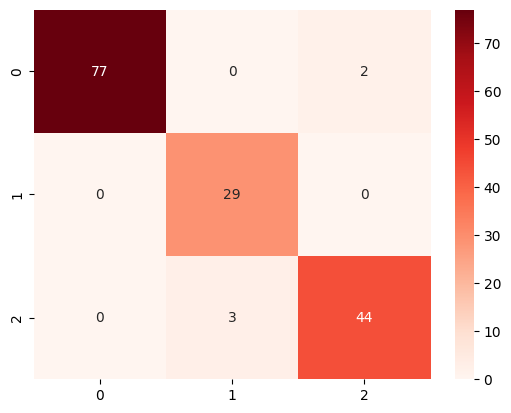

In [76]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
parameters = {'n_estimators':np.arange(10,30,10),
              'criterion': ['entropy','gini'], 
              'max_depth': np.arange(5,20,5),
              'min_samples_split': np.arange(50,100,50),
              'min_samples_leaf': np.arange(50,200,50),
              'class_weight':['balanced']}
              
hyperp_search(classifier,parameters)

C:\Users\sofia\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_search.py:953: UserWarning: One or more of the test scores are non-finite: [nan nan nan]
  warnings.warn(


f1_train: nan using {'C': 1, 'class_weight': 'balanced', 'max_iter': 1000}
              precision    recall  f1-score   support

      moving       1.00      0.99      0.99        79
     falling       0.94      1.00      0.97        29
      others       0.98      0.96      0.97        47

    accuracy                           0.98       155
   macro avg       0.97      0.98      0.98       155
weighted avg       0.98      0.98      0.98       155

Accuracy: 98.06451612903226%

[[78  0  1]
 [ 0 29  0]
 [ 0  2 45]]


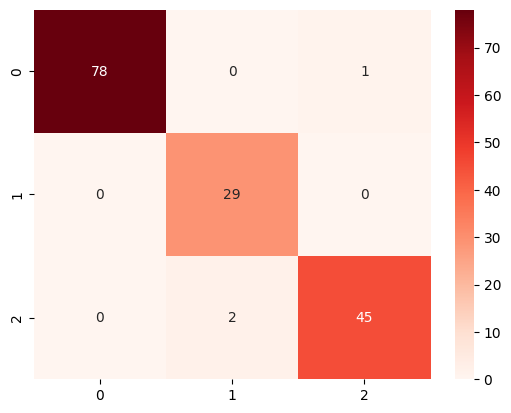

In [93]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression() 
parameters = {"C":[1,10,100], "max_iter":[1000],
              'class_weight':['balanced']} 

hyperp_search(classifier,parameters)

In [110]:
# k-means clustering
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, 
            init='random',  #init=’k-means++’ 
            n_init=10, 
            max_iter=300, 
            tol=1e-04, 
            random_state=0) #init=’k-means++’ 

km.fit(X_train) 
y_km = km.predict(X_train) 

In [111]:
km.cluster_centers_ #Coordinates of cluster centroids
km.cluster_centers_[:,0] #only x values

array([-0.22428123, -0.5303027 ,  0.78776388])

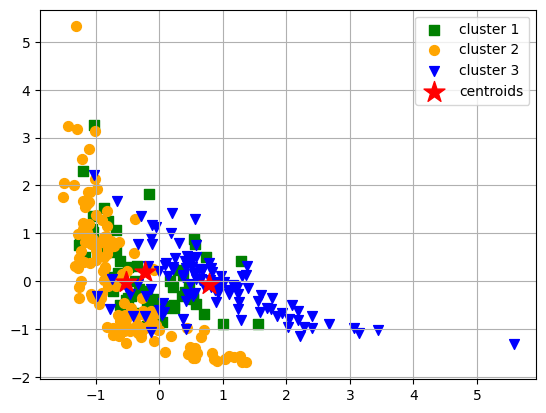

In [112]:
plt.scatter(X_train.iloc[y_km==0,0],X_train.iloc[y_km==0,1],s=50,c='green',marker='s',label='cluster 1')
plt.scatter(X_train.iloc[y_km==1,0],X_train.iloc[y_km==1,1],s=50,c='orange',marker='o',label='cluster 2')
plt.scatter(X_train.iloc[y_km==2,0],X_train.iloc[y_km==2,1],s=50,c='blue',marker='v',label='cluster 3')
# plt.scatter(X_train.iloc[y_km==3,0],X_train.iloc[y_km==3,1],s=50,c='yellow',marker='h',label='cluster 4')
# plt.scatter(X_train.iloc[y_km==4,0],X_train.iloc[y_km==4,1],s=50,c='purple',marker='D',label='cluster 5')
plt.scatter(km.cluster_centers_[:,0],
            km.cluster_centers_[:,1],
            s=250,c='red',
            marker='*',
            label='centroids')
plt.legend()
plt.grid()
plt.show()

#with 5 doesn't get better